Méthode du perceptron mutlicouche (multilayer perceptron) qui est un type de réseau neuronal artificiel où l'information ne circule que dans un seul sens.

Accuracy 1 : 0.9473684210526315
Accuracy 2 : 0.9619883040935673
AUC 1 :  0.9924174174174174
AUC 2 :  0.9824324324324324


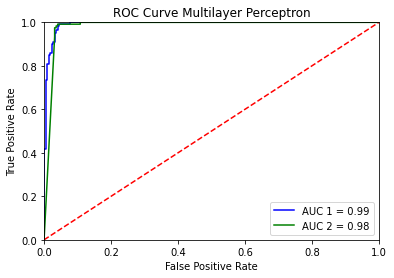

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, accuracy_score
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
#import matplotlib.patches as mpatches
import numpy as np
import scipy.io as sp
#from sklearn.decomposition import PCA

#Traitement du fichier .mat
cancercell = sp.loadmat('breastw.mat')
X = cancercell['X']
y = cancercell['y']
#print(cancercell)
y=np.reshape(y,(683,))
#Séparation des données d'apprentissage et des données tests
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y)
#fin traitement mat

#Algorithme Réseau de neurones = Perceptron multicouches
#Modèle1
mlp1 = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(8, 2), random_state=1)
mlp1.fit(X_train, y_train)
prediction1 = mlp1.predict(X_test)

#Modèle2
mlp2 = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(9, 2), random_state=1) #modif du nombre de couches cachées par ex ici 9
mlp2.fit(X_train, y_train)
prediction2 = mlp2.predict(X_test)

#Accuracy
result1 = accuracy_score(y_test,prediction1)
print("Accuracy 1 :",result1)

result2 = accuracy_score(y_test,prediction2)
print("Accuracy 2 :",result2)

#ROC curve
#Modèle 1 et 2 
y_scores1 = mlp1.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores1[:, 1])
roc_auc = auc(fpr, tpr)
print("AUC 1 : ", roc_auc)

y_scores2 = mlp2.predict_proba(X_test)
fpr2, tpr2, threshold2 = roc_curve(y_test, y_scores2[:, 1])
roc_auc2 = auc(fpr2, tpr2)
print("AUC 2 : ", roc_auc2)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC 1 = %0.2f' % roc_auc)
plt.plot(fpr2, tpr2, 'g', label = 'AUC 2 = %0.2f' % roc_auc2)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve Multilayer Perceptron')
plt.show()
